<a href="https://colab.research.google.com/github/DrewFinley/IMSE-441/blob/main/IMSE_441_Final_Project(Drew_Finley).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the final project, you need to demonstrate your data analytics skills from data understanding, cleaning, descriptive statsistics, visualization and statistical analysis. Your final project should be a clean code and proper markdown. 

- Information about data:-
    >experience_level: 
    - SE: Senior level
    - MI: medium level
    - EN: Entry level
    - EX: Executive level

    >employment_type: 
    - FT(Full-Time)
    - PT(Part-Time)
    - CT(Contract)
    - FL(Freelance)
    
    >company_size: 
    - L large
    - M Medium
    - S Small

1. Import the dataset 'ds_salaries' from github and find out data types. Mention what are the categorical and numerical columns present. Perform data cleaning if needed.
2. Display the column names and # of unique values in each column. Write 2 lines to show your understanding from the unique values (you can choose for any 2 columns).
3. Drop the columns 'salary_currency','employee_residence' & 'remote_ratio' from your data set. Evaluate how many 'Analytics Engineer' are present in the dataset, mention the mean salary for this job title ? Construct a bar plot of salaries for this job profile
4. Construct a histogram of 'salary' for the entire dataset, from the graph comment on salary range for most people.
5. Create a pie plot for 'job_title' and mention the category with highest # of peeople.
6. How many people have salary > 400000 [Hint: you can use '>' sign as a condition]. Display the first 2 rows of those people
7. Do a boxplot for 'salary' in each year. Mention the median value of salary each year.
8. Use a bar/pie plot and label clearly to answer the following
  >a) What %of people have executive level of experience

  >b) What %of people are employed in Large size company

  >c) What %of people in 'USA' have part time jobs
9. Using bar plot try to visualize (label clearly )
  > a) employment_type' vs 'company_location
  
  > b)'company_size' vs 'company_location'

  >c) 'employment_type' vs 'experience_level'

10. Plot a histogram for age, check if it is a normal distribution. Create a 96% CI in 'age', perform ttesting to see if 30 is an acceptable mean value of age or not based on 96% CI. 
11. Construct a Simple Linear Regression Model (build the equation) for 'age' and 'salary' data. Find the regression coefficients, assume x = 'age' and y ='salary'. [This is a toy dataset and has no resemblance with reality]. 


In [1]:
!pip install pingouin

 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=fe3878b561ee8759de43b3c29a943c098d1161868bfaa615059ca8c03cab5b1a
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
import pingouin as pg
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import ttest_1samp
from scipy.stats import norm
from scipy.stats import randint
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats.distributions import weibull_min
from seaborn.regression import statsmodels
import seaborn as sns
import scipy.stats as stats


# 1


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/KhmAsif/IMSE441/main/ds_salaries.csv')

In [4]:
df.head()

,year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,age
0,2023,SE,FT,Principal Data Scientist,80000,EUR,ES,100,USA,L,44
1,2023,MI,CT,ML Engineer,30000,USD,US,100,USA,S,51
2,2023,MI,CT,ML Engineer,25500,USD,US,100,USA,S,27
3,2023,SE,FT,Data Scientist,175000,USD,CA,100,USA,M,54
4,2023,SE,FT,Data Scientist,120000,USD,CA,100,USA,M,48


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                115 non-null    int64 
 1   experience_level    115 non-null    object
 2   employment_type     115 non-null    object
 3   job_title           115 non-null    object
 4   salary              115 non-null    int64 
 5   salary_currency     115 non-null    object
 6   employee_residence  115 non-null    object
 7   remote_ratio        115 non-null    int64 
 8   company_location    115 non-null    object
 9   company_size        115 non-null    object
 10  age                 115 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 10.0+ KB


There are 3 integer columns, and the rest are objects, more specificically strings.

In [6]:
df.isnull().sum()

year                  0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
age                   0
dtype: int64

In [7]:
len(df)

115

No data cleaning is needed. There are no entires with NaN values. The titles could be changed to replace the _ with a space but leaving as is will work for this assignment. 

# 2


In [8]:
df.nunique()

year                   2
experience_level       4
employment_type        4
job_title             15
salary                97
salary_currency        5
employee_residence    10
remote_ratio           3
company_location       2
company_size           3
age                   35
dtype: int64

There are 97 different salary values in the data and 5 different currencies of those values. There are 10 different countries of employees represented in the data but there are only two countires for the companies. There are 15 different types of jobs.

# 3

In [9]:
df = df.drop(['salary_currency', 'employee_residence', 'remote_ratio'], axis =1)
df


,year,experience_level,employment_type,job_title,salary,company_location,company_size,age
0,2023,SE,FT,Principal Data Scientist,80000,USA,L,44
1,2023,MI,CT,ML Engineer,30000,USA,S,51
2,2023,MI,CT,ML Engineer,25500,USA,S,27
3,2023,SE,FT,Data Scientist,175000,USA,M,54
4,2023,SE,FT,Data Scientist,120000,USA,M,48
...,...,...,...,...,...,...,...,...
110,2022,EN,PT,Machine Learning Engineer,54000,EUR,S,42
111,2023,SE,PT,Data Scientist,150000,EUR,M,51
112,2023,SE,PT,Data Scientist,120000,EUR,M,39
113,2023,SE,PT,Analytics Engineer,289800,EUR,M,36


In [10]:
print(df['job_title'].value_counts()['Analytics Engineer'])

6


There are 6 Analytics Engineers in the dataset. 

In [11]:
analytics = df[df['job_title']=='Analytics Engineer']
analytics['salary'].mean()

190991.66666666666

The average salary for the Analytics Engineer position is $190,991.

Text(0, 0.5, 'Salary')

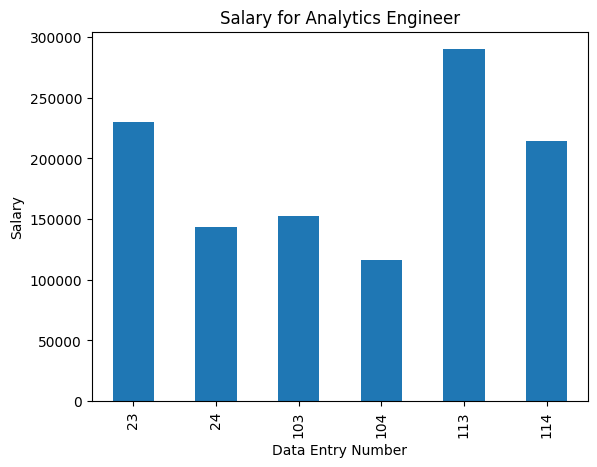

In [12]:
analytics['salary'].plot(kind = 'bar', title= 'Salary for Analytics Engineer')
plt.xlabel('Data Entry Number')
plt.ylabel('Salary')

# 4

Text(0, 0.5, 'Frequency')

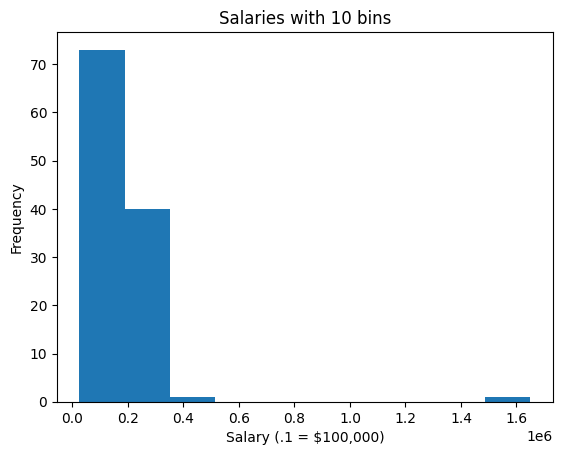

In [38]:
df['salary'].plot(kind = 'hist', bins = 10, title = 'Salaries with 10 bins')
plt.xlabel('Salary (.1 = $100,000)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

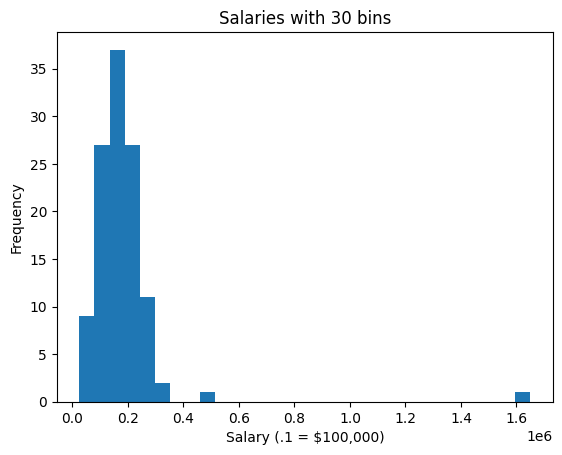

In [39]:
df['salary'].plot(kind = 'hist', bins = 30, title = 'Salaries with 30 bins')
plt.xlabel('Salary (.1 = $100,000)')
plt.ylabel('Frequency')

It takes a lot of bins to get a good picture of the data. The highest frequency of salaries are just under 200,000. The histogram shows a normal distribution of the salaries around this value. Most people have a salary between 100,000 and 300,000 There are a couple of outliers, one near 500,000 and one at 1.6 million.

# 5

<Axes: title={'center': 'Salary Breakdown'}>

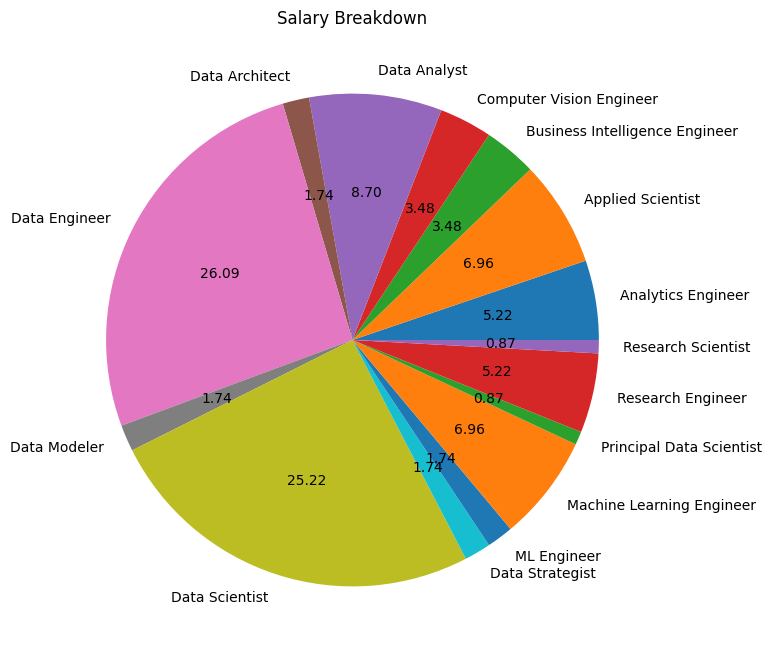

In [14]:
title = df.groupby('job_title').size()
title.plot(kind = 'pie', title = 'Salary Breakdown', autopct = '%.2f', figsize = (8,8))

Data Engineer has the highest number of people followed closely by Data Scientist.

# 6

In [15]:
salary_400 = df[df['salary'] > 400000]
(df['salary'] > 400000).sum()



2

In [16]:
salary_400

,year,experience_level,employment_type,job_title,salary,company_location,company_size,age
39,2022,MI,FL,Machine Learning Engineer,1650000,USA,L,57
78,2023,MI,FL,Data Scientist,510000,USA,L,32


# 7

In [17]:
sal_2022 = (df[df['year'] == 2022]['salary'])
sal_2023 = (df[df['year'] == 2023]['salary'])
data = [sal_2022,sal_2023]


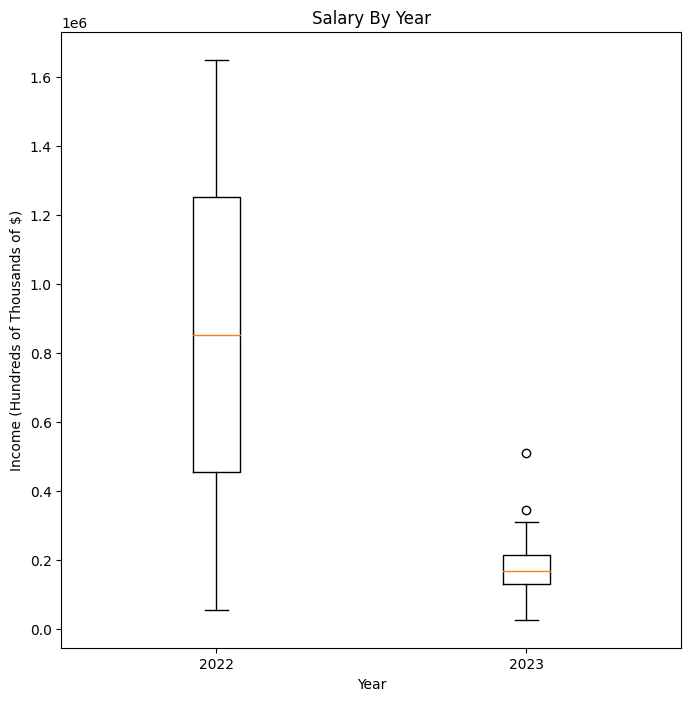

In [18]:
plt.figure(figsize=(8,8))
plt.boxplot(data)
plt.title('Salary By Year')
plt.xlabel('Year')
plt.ylabel('Income (Hundreds of Thousands of $)')
plt.xticks([1,2],['2022','2023'])
plt.show()

The median value for 2022 is just over 800,000. The median for 2023 is much lower, just under 200,000.

# 8

### a)

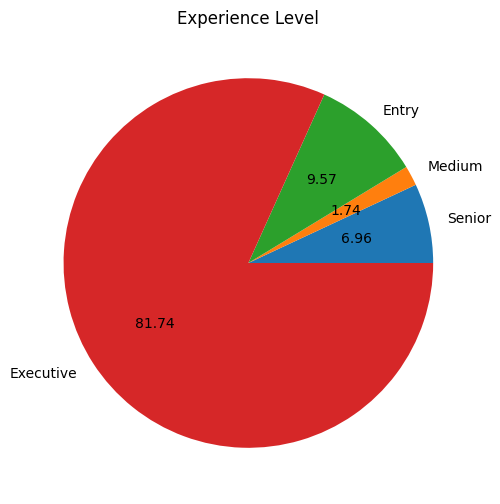

In [19]:
experience = df.groupby('experience_level').size()
experience.plot(kind='pie', labels = ['Senior','Medium', 'Entry','Executive'],autopct='%.2f', fontsize=10, figsize=(6, 6), title = 'Experience Level');

In [20]:
print(df['experience_level'].value_counts()['SE']/len(df['experience_level'])*100)

81.73913043478261


81.74% of the people are at an executive level of experience. 

### b)

<Axes: title={'center': 'Company Size'}>

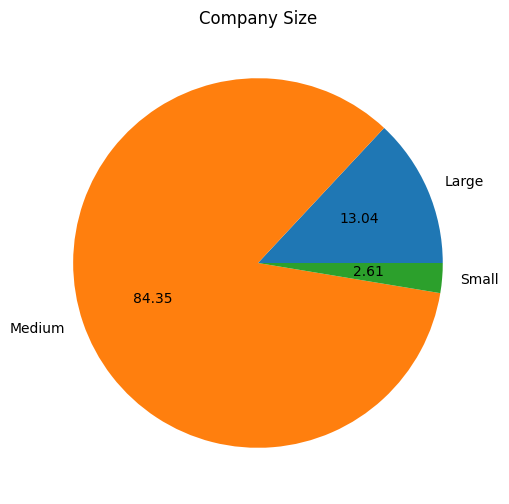

In [21]:
size = df.groupby('company_size').size()
size.plot(kind='pie', labels = ['Large','Medium', 'Small',],autopct='%.2f', fontsize=10, figsize=(6, 6), title = 'Company Size')

In [22]:
print(df['company_size'].value_counts()['L']/len(df['company_size'])*100)

13.043478260869565


13.04% of people are employed at a Large Company.

### c)

<Axes: title={'center': 'Employment Type in USA'}, ylabel='employment_type'>

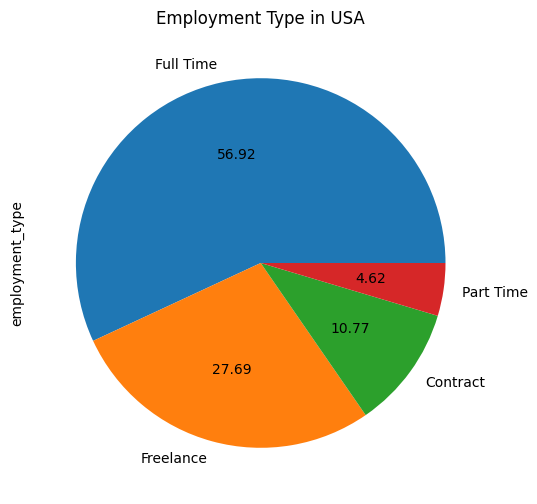

In [23]:
USA_jobs = (df[df['company_location'] == 'USA']['employment_type']).value_counts()
USA_jobs.plot(kind='pie', labels = ['Full Time','Freelance', 'Contract','Part Time'],autopct='%.2f', fontsize=10, figsize=(6, 6), title = 'Employment Type in USA')

In [24]:
print(USA_jobs['PT']/USA_jobs.sum()*100)

4.615384615384616


4.62% of people in the US work part-time jobs.

# 9

### a)

In [25]:
type_v_loc = df.groupby(['employment_type','company_location']).size().unstack()
type_v_loc



company_location,EUR,USA
employment_type,,
CT,2,7
FL,3,18
FT,26,37
PT,19,3


Text(0, 0.5, 'Number of Employees')

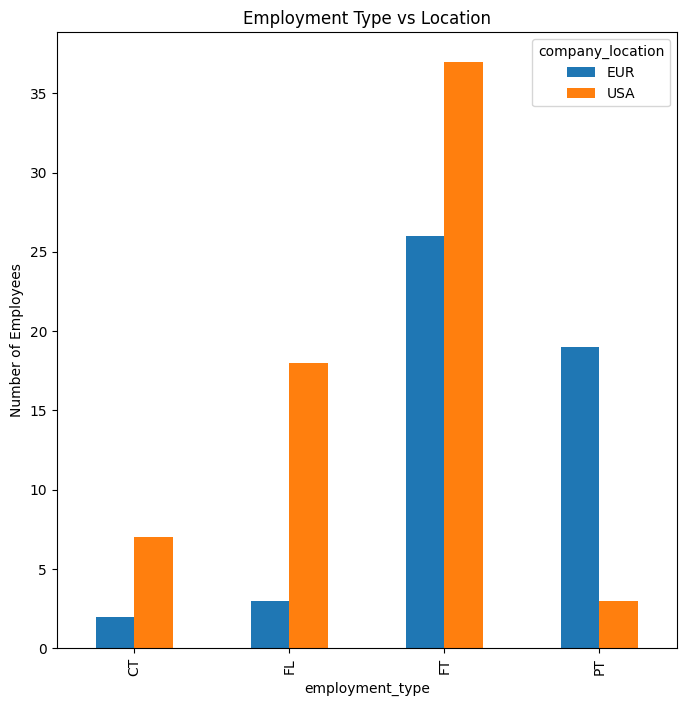

In [26]:
type_v_loc.plot(kind = 'bar', figsize = (8,8), title = 'Employment Type vs Location')
plt.ylabel('Number of Employees')

### b)

Text(0, 0.5, 'Number of Companies')

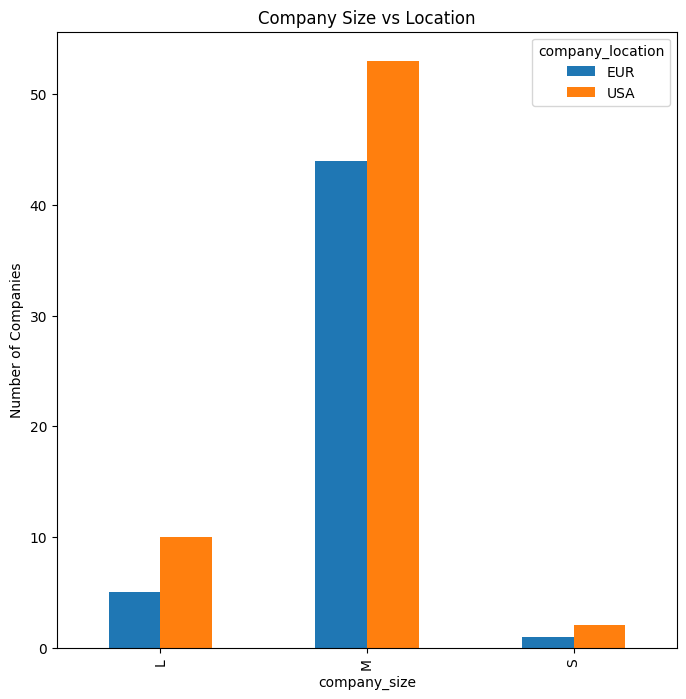

In [27]:
size_v_loc = df.groupby(['company_size','company_location']).size().unstack()
size_v_loc.plot(kind = 'bar', figsize = (8,8), title = 'Company Size vs Location')
plt.ylabel('Number of Companies')

### c)

Text(0, 0.5, 'Number of Employees')

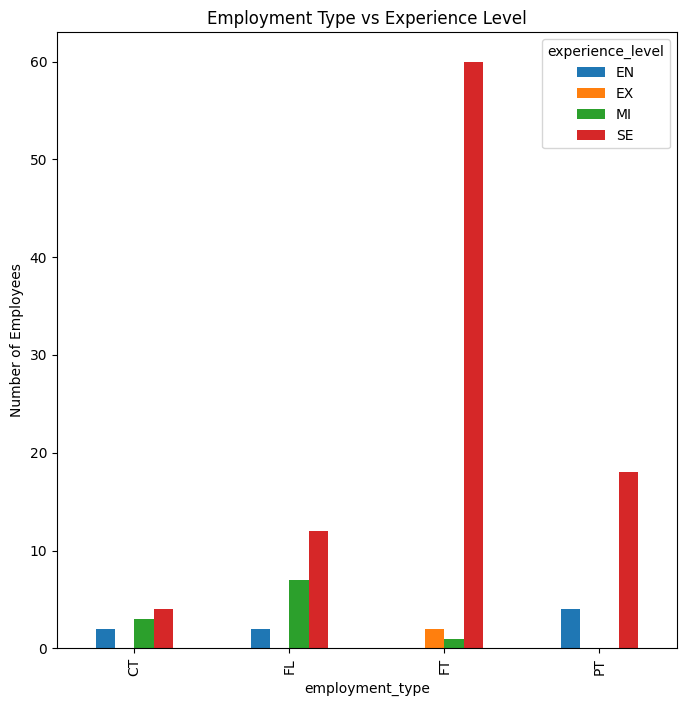

In [28]:
type_v_exp = df.groupby(['employment_type','experience_level']).size().unstack()
type_v_exp.plot(kind = 'bar', figsize = (8,8), title = 'Employment Type vs Experience Level')
plt.ylabel('Number of Employees')

# 10

<Axes: ylabel='Frequency'>

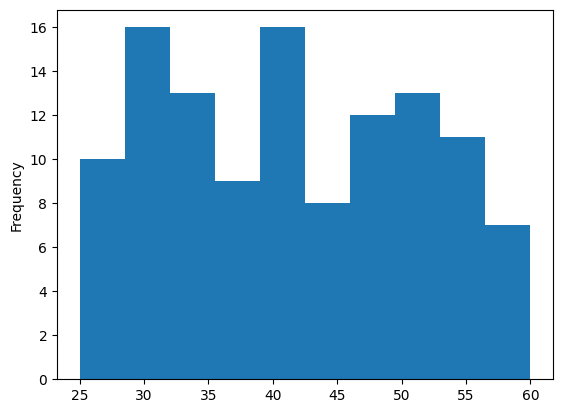

In [41]:
age = df['age']
age.plot(kind = 'hist', bins = 10)

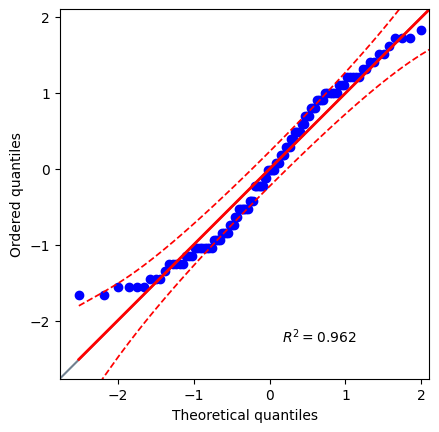

In [30]:
pg.qqplot(age)
plt.show()

The data appears normal as most of the points lie within the barriers. 

In [31]:
ttest_1samp(age, popmean = 30).confidence_interval(confidence_level = .96)

ConfidenceInterval(low=39.281757281509634, high=43.08346010979471)

With 96% confidence, 96 out of 100 times, the mean age value falls between ~39 and 43. From this we can say that 30 is not the mean, or reject H0. 

In [42]:
ttest_1samp(a = age, popmean = 30)

TtestResult(statistic=12.221906042968829, pvalue=1.8352675934333261e-22, df=114)

Running a ttest on the mean backs up the claim as the pvalue is almost zero. Indicating that H0, mean = 30, should be rejected as the pvalue is lower than alpha. 

# 11

In [32]:
import scipy as scipy
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

In [33]:
x = df[['age']]
y= df['salary']
x

,age
0,44
1,51
2,27
3,54
4,48
...,...
110,42
111,51
112,39
113,36


In [34]:
model = lm.LinearRegression()
model.fit(x,y)

LinearRegression()

In [35]:
print('B1 =', model.coef_)
print("B0 =", model.intercept_)

B1 = [1540.13479365]
B0 = 118586.24015009381


# **y = 118586.24015009381 + 1540.13479365 * x** 